In [47]:
import pickle
import numpy as np

In [48]:
with open("train_qa.txt","rb") as fp:
    train_data = pickle.load(fp)

In [27]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [28]:
with open("test_qa.txt","rb") as fp:
    test_data = pickle.load(fp)

In [29]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [30]:
len(train_data)

10000

In [31]:
len(test_data)

1000

In [32]:
#extracting a story from train data
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [33]:
#extracting que
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [34]:
#extracting ans
train_data[0][2]

'no'

In [35]:
vocab = set()

In [36]:
all_data = test_data + train_data

In [37]:
type(all_data)

list

In [38]:
for story,que,ans in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(que))

In [39]:
vocab.add('yes')
vocab.add('no')

In [40]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [41]:
len(vocab)

37

In [42]:
vocab_len = len(vocab)+1

In [43]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [44]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [45]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [53]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

In [54]:
tokenizer = Tokenizer(filters = [])

In [55]:
tokenizer.fit_on_texts(vocab)

In [56]:
tokenizer.word_index

{'left': 1,
 'bathroom': 2,
 'john': 3,
 'picked': 4,
 'yes': 5,
 'up': 6,
 'down': 7,
 'no': 8,
 'kitchen': 9,
 'office': 10,
 'dropped': 11,
 'put': 12,
 'took': 13,
 'journeyed': 14,
 'discarded': 15,
 'the': 16,
 '?': 17,
 'back': 18,
 'is': 19,
 'grabbed': 20,
 'in': 21,
 'garden': 22,
 'went': 23,
 'hallway': 24,
 'milk': 25,
 'got': 26,
 'bedroom': 27,
 'daniel': 28,
 'travelled': 29,
 'sandra': 30,
 'football': 31,
 'to': 32,
 'there': 33,
 '.': 34,
 'apple': 35,
 'mary': 36,
 'moved': 37}

In [57]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  

In [58]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [59]:
len(train_story_text)

10000

In [60]:
len(train_story_seq)

10000

In [61]:
train_story_seq

[[36, 37, 32, 16, 2, 34, 30, 14, 32, 16, 27, 34],
 [36,
  37,
  32,
  16,
  2,
  34,
  30,
  14,
  32,
  16,
  27,
  34,
  36,
  23,
  18,
  32,
  16,
  27,
  34,
  28,
  23,
  18,
  32,
  16,
  24,
  34],
 [36,
  37,
  32,
  16,
  2,
  34,
  30,
  14,
  32,
  16,
  27,
  34,
  36,
  23,
  18,
  32,
  16,
  27,
  34,
  28,
  23,
  18,
  32,
  16,
  24,
  34,
  30,
  23,
  32,
  16,
  9,
  34,
  28,
  23,
  18,
  32,
  16,
  2,
  34],
 [36,
  37,
  32,
  16,
  2,
  34,
  30,
  14,
  32,
  16,
  27,
  34,
  36,
  23,
  18,
  32,
  16,
  27,
  34,
  28,
  23,
  18,
  32,
  16,
  24,
  34,
  30,
  23,
  32,
  16,
  9,
  34,
  28,
  23,
  18,
  32,
  16,
  2,
  34,
  28,
  4,
  6,
  16,
  31,
  33,
  34,
  28,
  23,
  32,
  16,
  27,
  34],
 [36,
  37,
  32,
  16,
  2,
  34,
  30,
  14,
  32,
  16,
  27,
  34,
  36,
  23,
  18,
  32,
  16,
  27,
  34,
  28,
  23,
  18,
  32,
  16,
  24,
  34,
  30,
  23,
  32,
  16,
  9,
  34,
  28,
  23,
  18,
  32,
  16,
  2,
  34,
  28,
  4,
  6,
  16,
 

In [62]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [63]:

def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_ques_len = max_ques_len):

  X = [] #stories
  Xq = [] #quetion
  Y = [] #correct Answer

  for story,query, answer in data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]
    y = np.zeros(len(word_index) +1)
    y[word_index[answer]] =1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return(pad_sequences(X,maxlen = max_story_len),
         pad_sequences(Xq, maxlen = max_ques_len),
         np.array(Y))



In [64]:
input_train, query_train, answer_train = vectorize_stories(train_data)

In [65]:
input_test, query_test, answer_test = vectorize_stories(test_data)

In [66]:
input_train

array([[ 0,  0,  0, ..., 16, 27, 34],
       [ 0,  0,  0, ..., 16, 24, 34],
       [ 0,  0,  0, ..., 16,  2, 34],
       ...,
       [ 0,  0,  0, ..., 16, 27, 34],
       [ 0,  0,  0, ..., 25, 33, 34],
       [ 0,  0,  0, ..., 35, 33, 34]], dtype=int32)

In [67]:
query_test

array([[19,  3, 21, 16,  9, 17],
       [19,  3, 21, 16,  9, 17],
       [19,  3, 21, 16, 22, 17],
       ...,
       [19, 36, 21, 16, 27, 17],
       [19, 30, 21, 16, 22, 17],
       [19, 36, 21, 16, 22, 17]], dtype=int32)

In [68]:
answer_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
tokenizer.word_index['yes']

5

In [74]:
pip install Keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
from keras.layers import Embedding

In [77]:
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dense, Permute, Dropout, add,dot, concatenate, LSTM

In [78]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [79]:
#input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [80]:
#input_encoder_c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [81]:
#question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_ques_len ))
question_encoder.add(Dropout(0.3))

In [82]:
#Encode the sequences
input_encoded_m = input_encoder_m(input_sequence)

input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [83]:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [84]:
response = add([match,input_encoded_c ])
response = Permute((2,1))(response)

In [85]:
#concatenate
answer = concatenate([response,question_encoded])

In [86]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [87]:
answer = LSTM(32)(answer)

In [88]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [89]:
answer = Activation('softmax')(answer)

In [90]:
model = Model([input_sequence, question],answer )
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [91]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [92]:
history = model.fit([input_train, query_train], answer_train,
                    batch_size = 32, epochs = 200,
                    validation_data = ([input_test, query_test], answer_test)
                    )


Epoch 1/200
313/313 [==============================] - 11s 24ms/step - loss: 0.9553 - accuracy: 0.5004 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 2/200
313/313 [==============================] - 6s 18ms/step - loss: 0.7090 - accuracy: 0.5058 - val_loss: 0.6958 - val_accuracy: 0.4970
Epoch 3/200
313/313 [==============================] - 7s 22ms/step - loss: 0.6995 - accuracy: 0.4877 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 4/200
313/313 [==============================] - 6s 18ms/step - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 5/200
313/313 [==============================] - 7s 22ms/step - loss: 0.6959 - accuracy: 0.4954 - val_loss: 0.6958 - val_accuracy: 0.5030
Epoch 6/200
313/313 [==============================] - 7s 23ms/step - loss: 0.6954 - accuracy: 0.5029 - val_loss: 0.6975 - val_accuracy: 0.5030
Epoch 7/200
313/313 [==============================] - 7s 22ms/step - loss: 0.6953 - accuracy: 0.5008 - val_loss: 0.6974 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

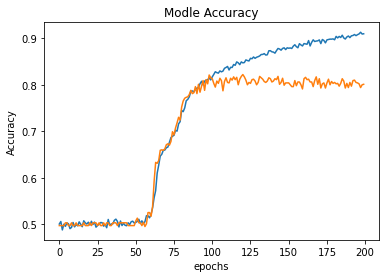

In [93]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title("Modle Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")

In [94]:
model.save("chatbot_model")

In [95]:
#evaluation on the test set
model.load_weights("chatbot_model")

In [96]:
pred_results = model.predict(([input_test, query_test]))

32/32 [==============================] - 1s 6ms/step


In [97]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [98]:
story = ' '.join(word for word in test_data[23][0])

In [99]:
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [100]:
query = ' '.join(word for word in test_data[23][1])

In [101]:
query

'Is Sandra in the bedroom ?'

In [102]:
test_data[23][2]

'no'

In [103]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print("Predicted Answer is", k)
print("Probability of certainity", pred_results[23][val_max])
                            

Predicted Answer is no
Probability of certainity 0.99997944


In [104]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [105]:
story = "Sandra grabbed the milk . Daniel dropped the apple in kitchen . "
story.split()

['Sandra',
 'grabbed',
 'the',
 'milk',
 '.',
 'Daniel',
 'dropped',
 'the',
 'apple',
 'in',
 'kitchen',
 '.']

In [106]:
my_question = "Is apple in the kitchen ? "

In [107]:
my_question.split()

['Is', 'apple', 'in', 'the', 'kitchen', '?']

In [108]:
mydata = [(story.split(),my_question.split(), "yes")]

In [109]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [110]:
pred_results = model.predict(([my_story, my_ques]))

1/1 [==============================] - 0s 26ms/step


In [111]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print("Predicted Answer is", k)
print("Probability of certainity", pred_results[0][val_max])
                            

Predicted Answer is yes
Probability of certainity 0.99978167
